In [20]:
import medmnist
import numpy as np
from medmnist import PneumoniaMNIST

In [21]:
#download_directory = '/Users/*****/Desktop/AMLS_23_24_SN22241679/Datasets'

#dataset1 = PneumoniaMNIST(split="train", root=download_directory,download=True)
#dataset2 = PneumoniaMNIST(split="val", root=download_directory,download=True)
#dataset3 = PneumoniaMNIST(split="test",root=download_directory,download=True)

In [22]:
data=np.load('pneumoniamnist.npz') # load the data

In [23]:
data.files

['train_images',
 'val_images',
 'test_images',
 'train_labels',
 'val_labels',
 'test_labels']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
import platform
import pickle

In [25]:
Xray = data.files #save the data

#Put the data in each sets
x_train=np.array(data[Xray[0]])
x_val=np.array(data[Xray[1]])
x_test=np.array(data[Xray[2]])

y_train=np.array(data[Xray[3]])
y_val=np.array(data[Xray[4]])
y_test=np.array(data[Xray[5]])

In [26]:
print(x_train.shape) #check the shape to determine CNN input shape
print(x_val.shape)
print(x_test.shape)

(4708, 28, 28)
(524, 28, 28)
(624, 28, 28)


In [27]:
#Combine the data together
x = np.concatenate((x_train, x_val, x_test), axis=0)
y = np.concatenate((y_train, y_val, y_test), axis=0)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15) #split the data with test size 15%

In [29]:
model=Sequential()

# Feature Learning Layers
model.add(Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())#Prepare for classification

#Classification Layers
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

#Check system os for optimisation in execution
if platform.system() == "Darwin" and platform.processor() == "arm":
    opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005)
else:
    opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
    
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model.fit(x_train,y_train,batch_size=128, epochs=30, validation_split=0.2)

Epoch 1/30
32/32 [==============================] - 1s 23ms/step - loss: 1.0729 - accuracy: 0.7460 - val_loss: 0.3236 - val_accuracy: 0.8624
Epoch 2/30
32/32 [==============================] - 1s 22ms/step - loss: 0.2444 - accuracy: 0.8963 - val_loss: 0.2329 - val_accuracy: 0.9016
Epoch 3/30
32/32 [==============================] - 1s 20ms/step - loss: 0.2009 - accuracy: 0.9184 - val_loss: 0.1784 - val_accuracy: 0.9277
Epoch 4/30
32/32 [==============================] - 1s 20ms/step - loss: 0.1611 - accuracy: 0.9362 - val_loss: 0.2964 - val_accuracy: 0.8745
Epoch 5/30
32/32 [==============================] - 1s 20ms/step - loss: 0.1790 - accuracy: 0.9284 - val_loss: 0.1706 - val_accuracy: 0.9287
Epoch 6/30
32/32 [==============================] - 1s 21ms/step - loss: 0.1320 - accuracy: 0.9508 - val_loss: 0.1753 - val_accuracy: 0.9307
Epoch 7/30
32/32 [==============================] - 1s 21ms/step - loss: 0.1310 - accuracy: 0.9525 - val_loss: 0.1431 - val_accuracy: 0.9438
Epoch 8/30
32

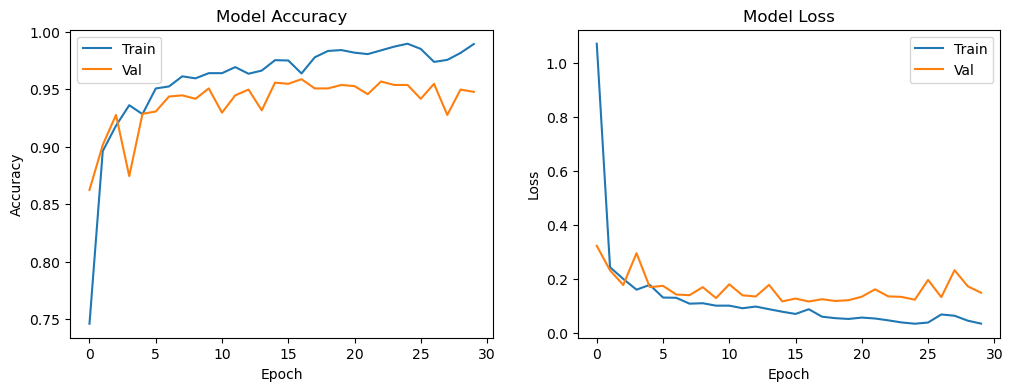

In [30]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')

plt.show()

In [31]:
ypred = model.predict(x_test)

28/28 [==============================] - 0s 3ms/step


In [32]:
Ypred=np.zeros(len(ypred))
for i in range(len(ypred)):
    if ypred[i]>=0.5:
        Ypred[i]=1
    else:
        Ypred[i]=0

In [33]:
accuracy_score(y_test,Ypred) #accuracy score

0.9533560864618885

In [34]:
# save the binary classification model as a pickle file
model_pkl_file = "binary_classifier_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)